In [2]:
# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

# Churn quantifies the number of customers who have left your brand by 
# cancelling their subscription or stopping paying for your services.

# Build the logistic regression model.
# Evaluate the model.
# Even a simple model will give us more than 70% accuracy. Why?
# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
# Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?



In [46]:
# Load the dataset and explore the variables.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import collections 


In [4]:
data = pd.read_csv('customer_churn.csv')

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL      

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Checking for null values

nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customerID,0.0
11,DeviceProtection,0.0
19,TotalCharges,0.0
18,MonthlyCharges,0.0
17,PaymentMethod,0.0
16,PaperlessBilling,0.0
15,Contract,0.0
14,StreamingMovies,0.0
13,StreamingTV,0.0
12,TechSupport,0.0


In [16]:
data_numeric = data.select_dtypes(np.number)


In [17]:
data_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [18]:
# Extract the target variable.
# Extract the independent variables and scale them.

In [19]:
y = data['Churn']
X = data_numeric[['SeniorCitizen', 'tenure', 'MonthlyCharges']]

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
#scaled_x = StandardScaler().fit_transform(X)

In [21]:
X_train

,SeniorCitizen,tenure,MonthlyCharges
6607,0,1,25.30
2598,0,7,75.15
2345,0,4,20.05
4093,0,29,76.00
693,0,3,75.10
...,...,...,...
3772,0,1,95.00
5191,0,23,91.10
5226,0,12,21.15
5390,1,12,99.45


In [22]:
X_test

,SeniorCitizen,tenure,MonthlyCharges
185,0,1,24.80
2715,0,41,25.25
3825,0,52,19.35
1807,0,1,76.35
132,0,67,50.55
...,...,...,...
5845,0,3,75.80
2301,0,8,90.25
5121,0,29,70.90
677,0,2,34.70


In [23]:
y_train

6607    Yes
2598     No
2345     No
4093     No
693     Yes
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5282, dtype: object

In [24]:
y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
5845    Yes
2301     No
5121     No
677     Yes
6062     No
Name: Churn, Length: 1761, dtype: object

In [25]:
# Transform training and test data 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[-0.43609145, -1.28288214, -1.31004561],
       [-0.43609145, -1.03785653,  0.34483164],
       [-0.43609145, -1.16036933, -1.48433058],
       ...,
       [-0.43609145, -0.83366851, -1.44781373],
       [ 2.293097  , -0.83366851,  1.15152206],
       [-0.43609145, -0.26194207, -1.49262986]])

In [27]:
X_test

array([[-0.43609145, -1.28288214, -1.32664418],
       [-0.43609145,  0.35062198, -1.31170547],
       [-0.43609145,  0.79983561, -1.50756857],
       ...,
       [-0.43609145, -0.13942926,  0.20374381],
       [-0.43609145, -1.24204454, -0.99799253],
       [ 2.293097  ,  0.84067322,  0.30001551]])

In [28]:
y_train.value_counts()

No     3892
Yes    1390
Name: Churn, dtype: int64

In [29]:
# Build the logistic regression model.

classifier = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr')

#classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [31]:
# Evaluate the model.

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
m = accuracy_score(y_test, y_pred)
print('Our model has',round(m*100,2),' % of accuracy')

[[1187   95]
 [ 261  218]]
Our model has 79.78  % of accuracy


In [32]:
# Even a simple model will give us more than 70% accuracy. Why?



In [35]:
X_a = X.to_numpy()

In [40]:
y_b = []
for i in y:
    if i == 'Yes':
        y_b.append(1)
    else:
        y_b.append(0)

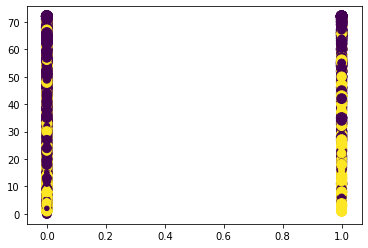

In [50]:
# Synthetic Minority Oversampling TEhnique (SMOTE) is an over sampling technique based on 
# nearest neighbors that adds new points between existing points. 
#Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. 
#Is it there any improvement?

import imblearn

plt.scatter(X_a[:,0], X_a[:,1], X_a[:,2],c=y_b);

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
#scaled_x = StandardScaler().fit_transform(X)

In [55]:
# Transform training and test data 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
# Build the logistic regression model.

classifier = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr')

#classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [57]:
y_pred = classifier.predict(X_test)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [58]:
# Evaluate the model.

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
m = accuracy_score(y_test, y_pred)
print('Our model has',round(m*100,2),' % of accuracy')

[[968 330]
 [344 945]]
Our model has 73.95  % of accuracy


In [61]:
# Tomek links are pairs of very close instances, but of opposite classes. 
# Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. 
# Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. 
# Is it there any improvement?

from imblearn.under_sampling import TomekLinks 
tl = TomekLinks()
X, y = tl.fit_resample(X, y)

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
#scaled_x = StandardScaler().fit_transform(X)

In [63]:
# Transform training and test data 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
# Build the logistic regression model.

classifier = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr')

#classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [65]:
y_pred = classifier.predict(X_test)
y_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [66]:
# Evaluate the model.

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
m = accuracy_score(y_test, y_pred)
print('Our model has',round(m*100,2),' % of accuracy')

[[987 292]
 [342 824]]
Our model has 74.07  % of accuracy
